<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Solution_Module_1_Lab_assignment_Cross_encoders_for_sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 - Lab assignment - Cross-encoders for sentence similarity

This notebook serves as the lab assignment for the course's first module. It provides practical examples and exercises to help learners understand the concept of cross-encoders in natural language processing.

This lab assignment's primary objective is to explore using cross-encoders for sentence similarity classification. This involves using pre-trained models to evaluate the semantic similarity between two sentences and predicting a score that indicates how similar they are.

Cross-encoders are neural network models that are designed to encode two different sequences of text simultaneously. Unlike bi-encoders, which encode two sentences separately and then compare them, cross-encoders encode the two sentences jointly to capture their interactions better.

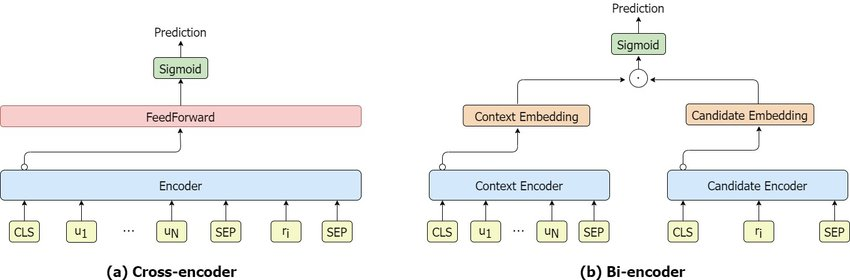

Cross-encoders work by taking two input sentences and passing them through a shared encoder, which generates a representation for each sentence. The representations are then concatenated and passed through a classifier to predict the similarity score. The shared encoder ensures that both sentences are encoded with the same set of parameters, enabling the model to capture their interactions and relationships more accurately.


**Assignment:** search for `TODO:` in the cells and write your code to accomplish the task. Besides, there is an **Assignment** section in the end of this notebook with two questions.

# Installing required packages

In this example, we have to install the **`transformers`**, **`datasets`** and **`sentence-transformers`** libraries. **`transformers`** and **`datasets`** are libraries from [Hugging Face](https://huggingface.co/), which is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.

**`sentence-transformers`**:

The [sentence-transformers](https://www.sbert.net/index.html) library is an open-source Python package that provides state-of-the-art models for computing sentence embeddings, which are vector representations of sentences in a high-dimensional space. This library is a powerful tool for cross-encoder semantic text similarity classification. It provides pre-trained models for a variety of natural language processing tasks, including sentence similarity classification.

In [ ]:
!pip install -q transformers datasets sentence-transformers

# Download dataset

The SemEval Semantic Textual Similarity (STS) dataset is a benchmark dataset for evaluating the performance of algorithms that measure the degree of semantic similarity between two pieces of text. The dataset is composed of sentence pairs, and each pair is assigned a similarity score by human annotators, ranging from 0 to 5. The dataset has been used in several research studies to develop and evaluate models for sentence similarity classification.

The code above loads the STS dataset using the Hugging Face **`datasets`** library and creates a Pandas DataFrame to store the data. The **`load_dataset()`** function takes two arguments: the name of the dataset ('`stsb_multi_mt`') and the language ('`en`'). The split parameter is set to '`test`', which means that only the test portion of the dataset will be loaded. The function returns a dictionary-like Dataset object

In [1]:
from datasets import load_dataset

test_dataset = load_dataset('stsb_multi_mt', 'en', split='test')

The code below converts the test dataset obtained from the **`load_dataset`** function of the **`datasets`** library into a pandas DataFrame. The **`pd.DataFrame()`** function from the pandas library is used to create the **`DataFrame`**. 

The **`head()`** function is used to display the first few rows of a pandas dataframe. The dataframe has three columns: **`sentence1`**, **`sentence2`**, and **`similarity_score`**, which contain the two sentences to be compared and the similarity score assigned by human annotators.



In [7]:
import pandas as pd
test_dataset_df = pd.DataFrame(test_dataset)
test_dataset_df.head()

,sentence1,sentence2,similarity_score
0,A girl is styling her hair.,A girl is brushing her hair.,2.5
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2
4,A man is playing a harp.,A man is playing a keyboard.,1.5


# Model Evaluation


In this section, we will perform the model evaluation. We will use two different methods for evaluating the models: the first method involves using the CrossEncoder class from **`sentence-transformers`** library, while the second method involves using the HF **`transformers`** library. 

The evaluation process for our semantic text similarity model involves measuring the Spearman correlation between the model scores and the human scores. 

## Selecting the Model

We will use a RoBERTa model fine-tuned on the STS task. RoBERTa is a pre-trained neural network architecture developed by Facebook AI Research, which uses a modified version of BERT's pre-training process. The key difference between RoBERTa and BERT is that the former is trained on more data and with more extensive training objectives. RoBERTa has achieved state-of-the-art performance on a variety of natural language processing tasks, including sentiment analysis, question answering, and textual entailment.

The RoBERTa model fine-tuned on STS can be found on Hugging Face ([**`cross-encoder/stsb-roberta-base`**](https://huggingface.co/cross-encoder/stsb-roberta-base)). In addition to the RoBERTa model, Hugging Face also provides access to other cross-encoder models fine-tuned on STS ([see](https://huggingface.co/cross-encoder)).

In [8]:
MODEL_NAME = 'cross-encoder/stsb-roberta-base' # change the model name if you want to try different models.

## Using `sentence-transformers`

The **`CrossEncoder`** class from **`sentence-transformers`** is a user-friendly tool that simplifies the process of performing cross-encoder tasks such as semantic text similarity. This class provides a simple and straightforward API that abstracts away many of the details of the underlying processes, such as **tokenization**, **encoding**, and **scoring**, making it easy for users to perform text similarity tasks. 

Additionally, the **`CrossEncoder`** class includes a variety of pre-trained models for users to choose from, allowing them to quickly and easily experiment with different models and find the one that best suits their needs.

The code below loads the model using the **`CrossEncoder`** class.


In [9]:
from sentence_transformers.cross_encoder import CrossEncoder

model = CrossEncoder(MODEL_NAME)

The code below is used to predict the similarity scores for the test dataset using a pre-trained cross-encoder model from the sentence-transformers library. 

First, we select the columns "**sentence1**" and "**sentence2**" from the test dataset and assigns them to the variable "sentence_pairs". 

Then, the pre-trained model is used to predict the similarity scores for the sentence pairs. The **`predict()`** function of the cross-encoder model takes in a list of sentence pairs and returns a list of similarity scores. The predicted similarity scores are then assigned to the variable "similarity_scores".

Finally, the predicted similarity scores are added to the test dataset by creating a new column called "predicted_score" and assigning the similarity scores to this column using the pandas dataframe.

In [10]:
sentence_pairs = test_dataset_df[["sentence1", "sentence2"]].values
similarity_scores = model.predict(sentence_pairs)
test_dataset_df["predicted_score"] = similarity_scores

The cell below computes the Spearman's rank correlation coefficient between the "`similarity_score`" and "`predicted_score`" columns of the test dataset dataframe.

The [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) is a statistical measure that measures the strength and direction of association between two variables. In the context of the STS task, it measures the correlation between the predicted similarity scores produced by the model and the human-labeled similarity scores in the test dataset. 

The Spearman's rank correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation. Therefore, a higher Spearman's rank correlation coefficient value indicates that the model predictions are closer to the human scores, which is a good indicator of model performance.

The Spearman's rank correlation coefficient can be represented using the following equation:

\begin{equation}
r_s = 1 - \frac{6\sum d_i^2}{n(n^2-1)}
\end{equation}

where $r_s$ is the Spearman's rank correlation coefficient, $d_i$ is the difference between the ranks of the corresponding values in the two variables, and $n$ is the number of observations. The number 6 is a constant that is used to normalize the coefficient. It makes the coefficient fall within the range of -1 to +1.


In [11]:
test_dataset_df[["similarity_score","predicted_score"]].corr(method="spearman")

,similarity_score,predicted_score
similarity_score,1.000000,0.901726
predicted_score,0.901726,1.000000


## Using Hugging Face `transformers`

For using the Hugging Face transformers for cross encoder semantic text similarity, you need to first load the pre-trained model and its tokenizer using the **`AutoModelForSequenceClassification`** and **`AutoTokenizer`** classes, respectively. 


In [12]:
# TODO
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer_hf = AutoTokenizer.from_pretrained(MODEL_NAME)
model_hf = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).cuda()

Once the model and tokenizer are loaded, you can tokenize the input sentences using the tokenizer and create a tensor of features that can be fed into the model. Once the model and tokenizer are loaded, you can tokenize the input sentences using the tokenizer and create a tensor of features that can be fed into the model.


In [13]:
# Lets check sentence-transformers tokenization 
check_sent_transformers = model.tokenizer.encode(sentence_pairs[0])
print(check_sent_transformers)

# detokenize with huggingface tokenizer
tokenizer_hf.decode(check_sent_transformers)

[0, 250, 1816, 16, 23256, 69, 2549, 4, 2, 2, 250, 1816, 16, 32669, 69, 2549, 4, 2]


'<s>A girl is styling her hair.</s></s>A girl is brushing her hair.</s>'

In [15]:
import os 

def create_sentence_pairs(text):
    # lets add 2 times eos tokens (mimic sentence-transformers)
    text["sentence_pairs"] = text["sentence1"] + tokenizer_hf.eos_token + tokenizer_hf.eos_token + text["sentence2"]
    return text

test_dataset = test_dataset.map(create_sentence_pairs, batched=False, num_proc=os.cpu_count())

# checking
test_dataset['sentence_pairs'][0], test_dataset

Map (num_proc=4):   0%|          | 0/1379 [00:00<?, ? examples/s]

('A girl is styling her hair.</s></s>A girl is brushing her hair.',
 Dataset({
     features: ['sentence1', 'sentence2', 'similarity_score', 'sentence_pairs'],
     num_rows: 1379
 }))

In [16]:
# TODO

tokenized_data = test_dataset.map(
    lambda x: tokenizer_hf(
        x["sentence_pairs"], 
        truncation=False), 
    batched=True,
    num_proc=os.cpu_count(),
)

tokenized_data.set_format(type='torch', columns=['input_ids'])

tokenized_data

Map (num_proc=4):   0%|          | 0/1379 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence1', 'sentence2', 'similarity_score', 'sentence_pairs', 'input_ids', 'attention_mask'],
    num_rows: 1379
})

After that, the features can be passed to the model object to predict the similarity score for each sentence pair by calling the logits method on the model and passing the features tensor as input.

In [17]:
# TODO
preidct_score_hf = [model_hf(e.cuda().unsqueeze(0)).logits.item() for e in tokenized_data['input_ids']]

The next step is to apply an activation function to obtain the final similarity scores. 

You must import the activation function from PyTorch library with **`from torch import nn`**. Look at the [non-linear PyTorch activation functions set](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) and choose the most adequate to this task. Look for one that maps input values to a range between 0 and 1, is smooth and continuous, has a well-defined derivative, and may be symmetric around zero.

Finally, you have to apply the activation function to the logits to get the final scores. Then, store the predicted scores in a new column of the **`test_dataset_df`**.

In [18]:
# TODO

# checking sentence-transformers act
print(f"checking sentence-transformers act: {model.default_activation_function}")

import torch
m = torch.nn.Sigmoid()

test_dataset_df['predicted_score_HF'] = [m(torch.tensor(e)).item() for e in preidct_score_hf]
test_dataset_df

checking sentence-transformers act: Sigmoid()


,sentence1,sentence2,similarity_score,predicted_score,predicted_score_HF
0,A girl is styling her hair.,A girl is brushing her hair.,2.5,0.477538,0.477538
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6,0.837391,0.837391
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0,0.996481,0.996481
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2,0.955392,0.955392
4,A man is playing a harp.,A man is playing a keyboard.,1.5,0.311554,0.311554
...,...,...,...,...,...
1374,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks,0.0,0.186894,0.186894
1375,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe...",1.0,0.105753,0.105753
1376,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...,1.0,0.224270,0.224270
1377,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...,0.0,0.002297,0.002297


Finally, compute the Spearman's rank correlation coefficient between the "`similarity_score`" and the predicted scores columns of the test dataset dataframe.

In [19]:
# TODO

# given 
test_dataset_df[["similarity_score","predicted_score"]].corr(method="spearman")

,similarity_score,predicted_score
similarity_score,1.000000,0.901726
predicted_score,0.901726,1.000000


In [20]:
# predicted
test_dataset_df[["similarity_score","predicted_score_HF"]].corr(method="spearman")

,similarity_score,predicted_score_HF
similarity_score,1.000000,0.901726
predicted_score_HF,0.901726,1.000000


## Assignment

**Q1**: Did your implementation produce the same results as the implementation in **`sentence-transformers`**?

**Answer**: yes

**Q2**: If not, could you explain the reasons for any differences observed?

**Answer**: 